In [20]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
!ls ./Sensors

'20220419_bomin _S11_C01'  '20220421_bomin _S25_C03'  '20220429_bomin _S41_C02'
'20220419_bomin _S12_C01'  '20220421_bomin _S26_C03'  '20220429_bomin _S42_C05'
'20220419_bomin _S13_C02'  '20220421_bomin _S27_C03'  '20220429_bomin _S43_C01'
'20220419_bomin _S14_C02'  '20220421_bomin _S28_C03'  '20220429_bomin _S44_C06'
'20220419_bomin _S15_C03'  '20220422_bomin _S29_C05'  '20220429_bomin _S45_C06'
'20220420_bomin _S18_C05'  '20220422_bomin _S30_C05'  '20220501_bomin _S46_C04'
'20220420_bomin _S19_C06'  '20220422_bomin _S31_C05'  '20220501_bomin _S47_C03'
'20220420_bomin _S21_C06'  '20220422_bomin _S32_C04'  '20220501_bomin _S48_C04'
'20220420_bomin _S22_C06'  '20220422_bomin _S33_C04'  '20220501_bomin _S49_C03'
'20220421_bomin _S23_C03'  '20220425_bomin _S36_C05'
'20220421_bomin _S24_C03'  '20220425_bomin _S37_C02'


In [22]:
#원하는 폴더 고르기"
folder = '20220429_bomin _S43_C01'

In [23]:
#검토할 폴더 안의 모든 txt 불러오기
files = sorted(glob.glob('./Sensors/{}/*.txt'.format(folder)))
print("파일개수:",np.shape(files)[0])

파일개수: 71


In [24]:
#파일 이름 몇개 찍어보기
files[:5]

['./Sensors/20220429_bomin _S43_C01/20220429_155637_8e6cf_bomin _001_C1__sync.txt',
 './Sensors/20220429_bomin _S43_C01/20220429_155647_8e6cf_bomin _002_C1__sync.txt',
 './Sensors/20220429_bomin _S43_C01/20220429_155657_8e6cf_bomin _003_C1__sync.txt',
 './Sensors/20220429_bomin _S43_C01/20220429_155707_8e6cf_bomin _004_C1__sync.txt',
 './Sensors/20220429_bomin _S43_C01/20220429_155717_8e6cf_bomin _005_C1__sync.txt']

In [25]:
# readme 파일 제외 및 읽기
txt_files = []
title = []
for i in files:
    a = i.split('/')[3].split('__')[1].split('.txt')[0]
    b = i.split('/')[3]
    if a != 'readme':
        txt_files.append(i)
        title.append(b)
    else:
        with open(i, "r") as f:
            data = f.read()
            print(data)

# 데이터로 그래프 그려보기

파일 1개 그려보기

In [26]:
idx = 1   #파일번호
data = pd.read_csv(txt_files[idx], sep="\t", header=None)

In [27]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1651215397554,1651215397553,11.191,-9.690,3.484,0.204,-0.108,-1.232,8.910,-0.636,4.823,126.971489,37.295784
1,1651215397569,1651215397554,10.820,-9.273,3.201,0.389,-0.151,-1.298,8.796,-0.670,4.807,126.971489,37.295784
2,1651215397574,1651215397570,10.681,-8.873,2.887,0.546,-0.175,-1.358,7.776,-0.001,4.165,126.971489,37.295784


In [28]:
data.loc[(data[5] < 1) & (data[5] < 2)]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1651215397554,1651215397553,11.191,-9.690,3.484,0.204,-0.108,-1.232,8.910,-0.636,4.823,126.971489,37.295784
1,1651215397569,1651215397554,10.820,-9.273,3.201,0.389,-0.151,-1.298,8.796,-0.670,4.807,126.971489,37.295784
2,1651215397574,1651215397570,10.681,-8.873,2.887,0.546,-0.175,-1.358,7.776,-0.001,4.165,126.971489,37.295784
3,1651215397591,1651215397574,10.662,-8.833,2.703,0.682,-0.183,-1.433,7.514,0.362,3.806,126.971489,37.295784
4,1651215397593,1651215397591,10.779,-9.062,2.650,0.785,-0.213,-1.549,7.364,0.363,3.565,126.971489,37.295784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1651215407507,1651215407494,6.690,-7.985,1.221,-0.338,1.766,2.190,-0.510,-1.156,1.421,126.971390,37.295856
996,1651215407513,1651215407508,7.015,-8.042,1.130,-0.173,1.752,2.248,-0.118,-0.927,1.308,126.971390,37.295856
997,1651215407525,1651215407513,7.238,-8.112,0.855,0.005,1.773,2.308,0.368,-0.833,1.112,126.971390,37.295856
998,1651215407536,1651215407525,7.669,-8.165,0.402,0.182,1.805,2.367,0.760,-0.751,0.720,126.971390,37.295856


모인 시간 확인하기

In [29]:
from datetime import datetime

unixtime = data[0][0]
unixtime = unixtime/1000

print(datetime.fromtimestamp(int(unixtime)).strftime('%Y-%m-%d %H:%M:%S.%f'))

2022-04-29 15:56:37.000000


In [30]:
all_df = pd.DataFrame()
for i in range(len(txt_files)):
    temp_data = pd.read_csv(txt_files[i], sep="\t", header=None)
    all_df = all_df.append(temp_data, ignore_index=True)

In [31]:
len(all_df)

71000

In [32]:
print('min :{}'.format(round((len(all_df)*10/1000/60),4)), 'sec :{}'.format(len(all_df)*10/1000)) 

min :11.8333 sec :710.0


In [33]:
all_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1651215387561,1651215387560,5.019,-9.934,0.989,1.609,-1.587,-3.320,-1.728,-2.991,1.095,126.971512,37.295689
1,1651215387567,1651215387561,4.839,-10.015,0.819,1.559,-1.378,-3.307,-2.210,-3.310,0.817,126.971512,37.295689
2,1651215387577,1651215387566,4.544,-10.073,0.713,1.489,-1.198,-3.272,-2.428,-3.555,0.817,126.971512,37.295689
3,1651215387587,1651215387577,4.417,-10.128,0.620,1.411,-1.044,-3.209,-3.109,-3.943,0.539,126.971512,37.295689
4,1651215387594,1651215387587,4.207,-10.077,0.460,1.337,-0.918,-3.122,-3.303,-4.194,0.535,126.971512,37.295689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70995,1651216097479,1651216097466,5.734,-10.006,1.374,1.145,-2.913,-1.334,-2.164,-3.897,0.572,126.971519,37.294930
70996,1651216097484,1651216097479,6.153,-9.594,1.709,0.969,-2.996,-1.230,-1.770,-3.713,0.865,126.971519,37.294930
70997,1651216097497,1651216097484,6.424,-9.271,2.009,0.801,-2.977,-1.184,-1.441,-3.399,1.366,126.971519,37.294930
70998,1651216097504,1651216097498,6.584,-8.950,2.286,0.654,-2.885,-1.191,-1.251,-3.168,1.843,126.971519,37.294930


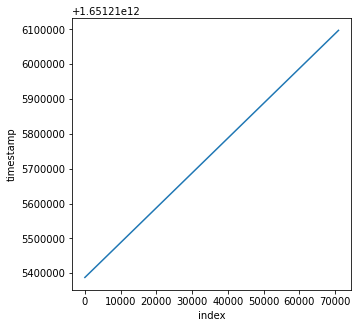

In [34]:
#시간 딜레이 여부 확인
f, ax = plt.subplots(figsize=(5,5))
ax.plot(all_df.iloc[:, 0])
ax.set_xlabel('index')
ax.set_ylabel('timestamp')
plt.show()

In [35]:
#sampling rate 계산

time_diff = []

for i in range(len(all_df)-1):
    diff = all_df.iloc[i+1, 0] - all_df.iloc[i, 0]
    time_diff.append(diff)

In [36]:
round(np.mean(time_diff), 3)

10.0

데이터 그려보기

In [37]:
t = []
for i in range(len(data)):
    t1 = data.iloc[0, 1]
    t2 = round((data.iloc[i, 1] - t1)/1000, 2)
    t.append(t2)

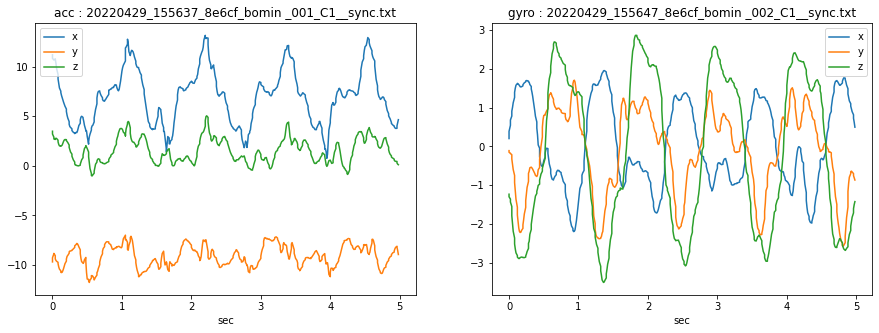

<Figure size 432x288 with 0 Axes>

In [38]:
f, ax = plt.subplots(1, 2, squeeze=False, figsize=(15,5))
for i in range(2):
    if i%2 == 0:
        ax[i//2, i%2].plot(t[:500], data.iloc[:500, 2:5].to_numpy())
        ax[i//2, i%2].set_title("acc : {}".format(title[i]))
        ax[i//2, i%2].set_xlabel('sec')
        ax[i//2, i%2].legend(['x', 'y', 'z']) 
    else:
        ax[i//2, i%2].plot(t[:500], data.iloc[:500, 5:8].to_numpy())
        ax[i//2, i%2].set_title("gyro : {}".format(title[i]))
        ax[i//2, i%2].set_xlabel('sec')
        ax[i//2, i%2].legend(['x', 'y', 'z']) 
    
plt.show()
plt.savefig('graph.png')

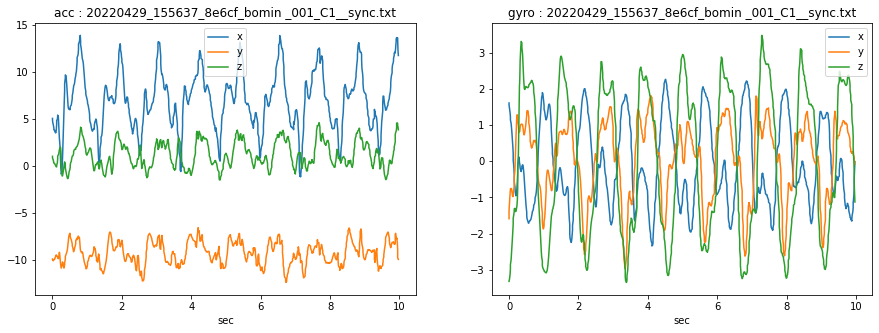

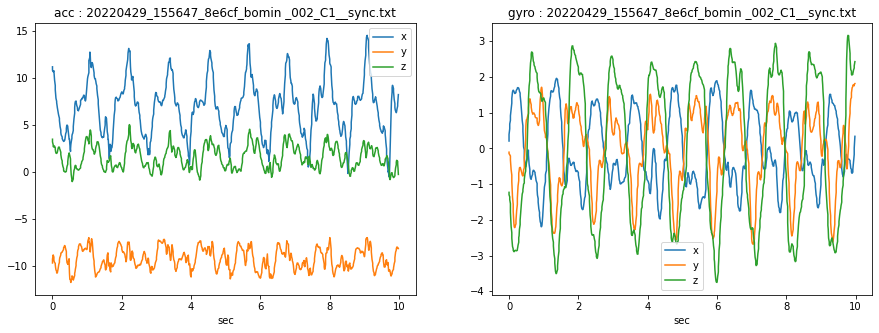

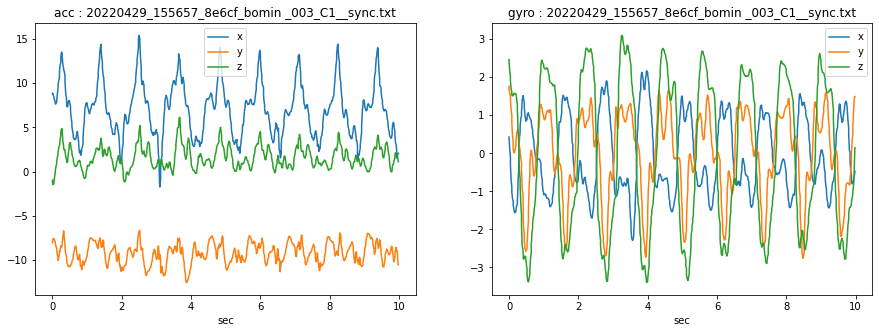

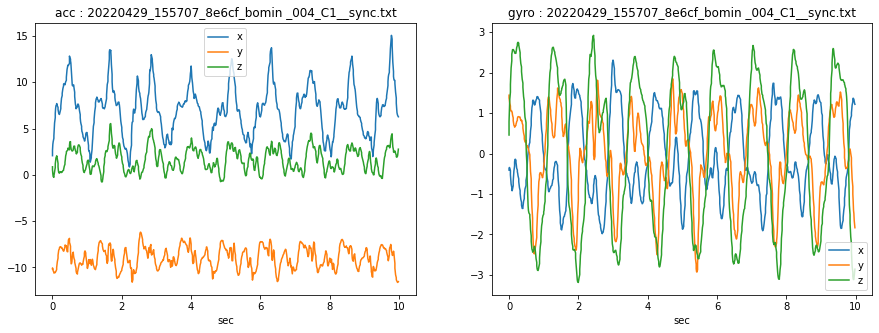

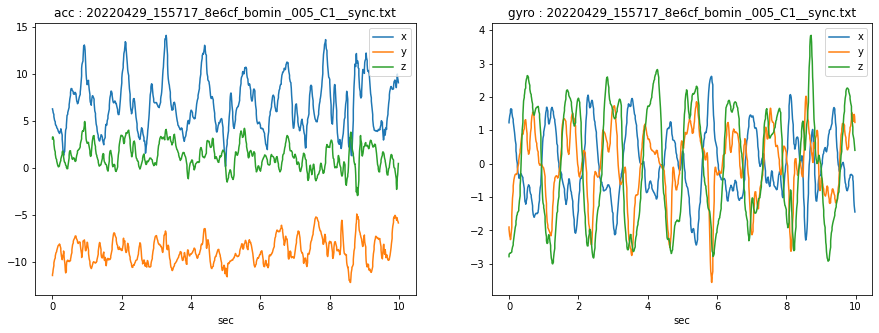

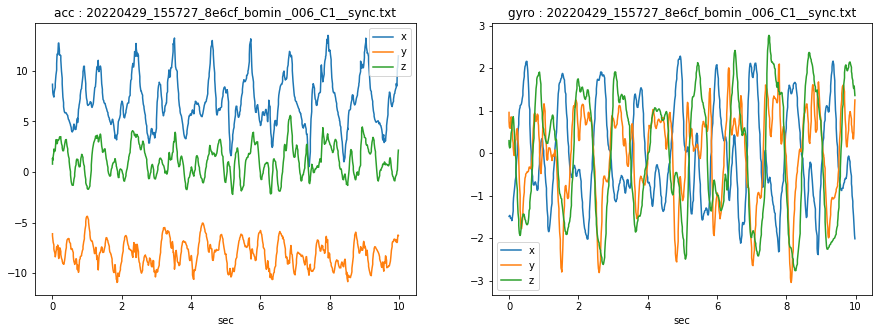

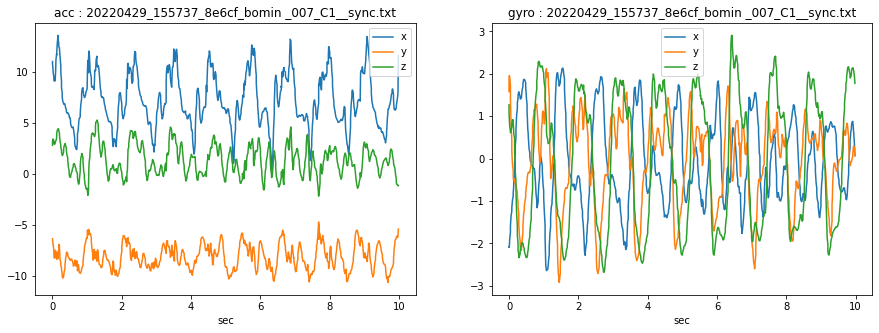

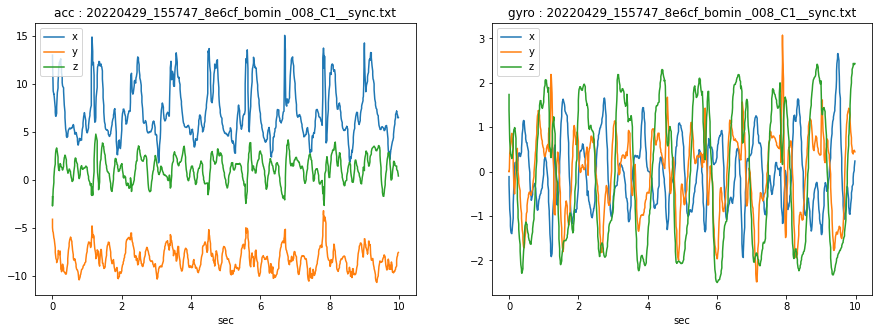

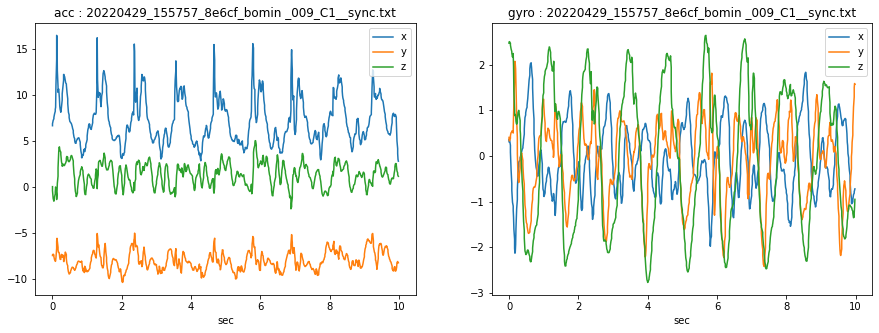

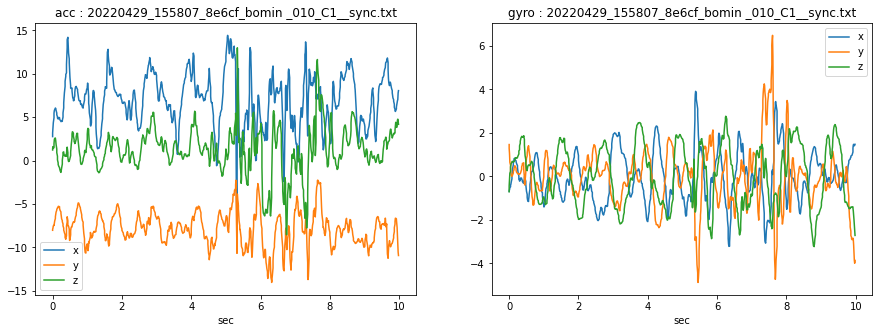

In [39]:
#그려보고 싶은 파일개수
num = 10

for j in range(num):
    data = pd.read_csv(txt_files[j], sep="\t", header=None)
    t = []
    for i in range(len(data)):
        t1 = data.iloc[0, 1]
        t2 = round((data.iloc[i, 1] - t1)/1000, 2)
        t.append(t2)
    f, ax = plt.subplots(1, 2, squeeze=False, figsize=(15,5))
    for i in range(2):
        if i%2 == 0:
            ax[i//2, i%2].plot(t, data.iloc[:, 2:5].to_numpy())
            ax[i//2, i%2].set_title("acc : {}".format(title[j]))
            ax[i//2, i%2].set_xlabel('sec')
            ax[i//2, i%2].legend(['x', 'y', 'z'])  
            
        else:
            ax[i//2, i%2].plot(t, data.iloc[:, 5:8].to_numpy())
            ax[i//2, i%2].set_title("gyro : {}".format(title[j]))
            ax[i//2, i%2].set_xlabel('sec')
            ax[i//2, i%2].legend(['x', 'y', 'z'])  
    
    plt.show()

여러개의 파일 이어서 그리기

In [40]:
#그려보고 싶은 파일개수
num = 5

total_data = pd.DataFrame()
for i in range(num): #첫번째 파일이 오류시 -> range(1, num+1)
    sub_data = pd.read_csv(txt_files[i], sep='\t', header=None)
    total_data = total_data.append(sub_data, ignore_index=True)

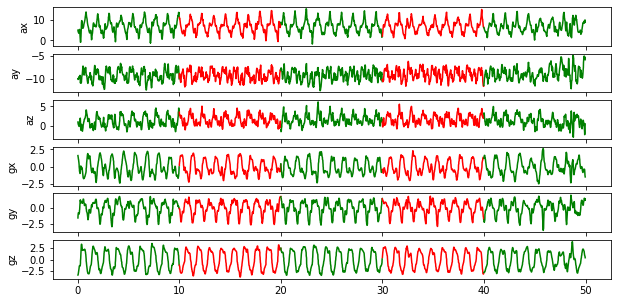

In [41]:
ylab = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
c = ['g', 'r']

t = []
for i in range(len(total_data)):
    t1 = total_data.iloc[0, 1]
    t2 = round((total_data.iloc[i, 1] - t1)/1000, 2)
    t.append(t2)

f, ax = plt.subplots(6, 1, squeeze=False, figsize=(10,5), sharex=True)

for j in range(num):

    start = 1000*j
    end = 1000*(j+1)
    
    for i in range(6):
#         ax[i, 0].plot(t[start:end], total_data.iloc[start:end, i+2], color = c[j%2])
        ax[i, 0].plot(t[start:end], total_data.iloc[start:end, i+2], color = c[j%2])
#         ax[i, 0].plot(t[start1:end1], total_data.iloc[start1:end1, i+2], color = 'r')
        ax[i, 0].set_ylabel(ylab[i])

plt.show()

# 지도위에 경로 그려보기


In [42]:
# 모든 txt 파일을 하나의 df로 만들기
all_data = pd.DataFrame() 
for i in txt_files:
    data = pd.read_csv(i, sep="\t", header=None)
    all_data = all_data.append(data, ignore_index=True)

In [43]:
data = all_data[[0,11,12]]  #시간과 좌표 column만 사용

In [44]:
# 좌표에 변동이 있을 때마다 새로운 list에 좌표 저장, 시간 저장
location = []
time = []

for i in range(len(data)-1):
    longitude1 = data[11].iloc[i]
    longitude2 = data[11].iloc[i+1]
    latitude1 = data[12].iloc[i]
    latitude2 = data[12].iloc[i+1]
    if longitude1 != longitude2 or latitude1 != latitude2:
        location.append([round(latitude1, 6), round(longitude1, 6)])
        time.append(data[0].iloc[i])

In [45]:
location

[[37.295689, 126.971512],
 [37.295696, 126.971519],
 [37.295704, 126.971519],
 [37.295719, 126.971519],
 [37.295731, 126.971519],
 [37.295742, 126.971519],
 [37.29575, 126.971512],
 [37.295757, 126.971512],
 [37.295769, 126.971504],
 [37.295776, 126.971497],
 [37.295784, 126.971489],
 [37.295799, 126.971481],
 [37.295811, 126.971474],
 [37.295822, 126.971466],
 [37.295834, 126.971451],
 [37.29583, 126.971451],
 [37.29583, 126.971443],
 [37.295834, 126.971436],
 [37.295841, 126.971428],
 [37.295849, 126.971413],
 [37.295856, 126.97139],
 [37.295864, 126.971382],
 [37.295876, 126.971367],
 [37.295883, 126.971359],
 [37.295891, 126.971344],
 [37.295898, 126.971329],
 [37.295898, 126.971321],
 [37.295898, 126.971306],
 [37.29591, 126.971291],
 [37.295914, 126.971275],
 [37.295921, 126.97126],
 [37.295929, 126.971245],
 [37.295937, 126.971237],
 [37.295944, 126.971222],
 [37.295952, 126.971214],
 [37.295956, 126.971199],
 [37.295956, 126.971184],
 [37.295956, 126.971169],
 [37.295956, 126.9

In [46]:
# millisecond인 시간을 분:초의 형태로 변환해서 리스트에 저장
import datetime

t = []
marker = []
for i, idx in enumerate(time):
    if i == 0:
        t1 = idx
    n = round((idx - t1)/1000, 1)
    min, sec = divmod(n, 60)
    tt = "%02d:%02d" % (min, sec)
    t.append(tt)
    marker.append([location[i], t[i]])
    #print(tt)

In [47]:
# 지도 위에 찍어보기
# !pip install folium
import folium
map_osm = folium.Map(location=[37.29516608833287, 126.97113901845593], zoom_start=17)


In [48]:
end = len(location)

for i, idx in enumerate(location):
    #print(i, idx)
    if i == 0:
        folium.Marker(location=idx, popup='Start', icon=folium.Icon(color='green',icon='star')).add_to(map_osm)
    elif i == end-1:
        folium.Marker(location=idx, popup='Finish time={}'.format(t[i]), icon=folium.Icon(color='red',icon='star')).add_to(map_osm)
    else:
        folium.Circle(location = idx, tooltip = marker[i], radius = 0.02).add_to(map_osm)

In [49]:
map_osm

In [28]:
map_osm.save('map.html')